**Analyse et segmentation de clientèle d'un magasin avec campagnes de marketing**
_Jules EXBRAYAT & Abdenour MADANI_

# Import des outils / jeu de données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

In [2]:
os.getcwd()

'/home/ab2/Documents/GitHub/ab2/analyse-survie/src'

In [3]:
np.random.seed(0)
sns.set_theme()

In [4]:
df = pd.read_csv(
    "../data/kickstarter_1.csv",
    parse_dates=True,
)

# Présentation

## Problématique

In [ ]:
#TODO: formuler une pbtique

## Jeu de données

In [16]:
#TODO: ajouter une description / une partie pour parler du jeu de données

### Lecture des données

### Présentation des variables

In [20]:
print(f"Il y a {df.shape[1]} variables qui décrivent {df.shape[0]} projets kickstarter.")

Il y a 56 variables qui décrivent 4175 projets kickstarter.


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4175 entries, 0 to 4174
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   day_succ                    4175 non-null   int64  
 1   Status                      4175 non-null   int64  
 2   cat1                        4175 non-null   int64  
 3   cat2                        4175 non-null   int64  
 4   cat3                        4175 non-null   int64  
 5   cat4                        4175 non-null   int64  
 6   cat5                        4175 non-null   int64  
 7   cat6                        4175 non-null   int64  
 8   cat7                        4175 non-null   int64  
 9   cat8                        4175 non-null   int64  
 10  cat9                        4175 non-null   int64  
 11  cat10                       4175 non-null   int64  
 12  cat11                       4175 non-null   int64  
 13  cat12                       4175 

Nous séparons les variables numériques des variables catégoriques pour plus de commodités.

In [35]:
var_categoriques = [
        f"cat{i}" for i in range(1, 16)
    ] + \
    [
        f"curr{i}" for i in range(1, 7)
    ] + \
    [
        "Status",
        "facebook_connected",
        "has_video"
    ]
var_categoriques


['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'curr1',
 'curr2',
 'curr3',
 'curr4',
 'curr5',
 'curr6',
 'Status',
 'facebook_connected',
 'has_video']

In [34]:
var_numeriques = df.columns 

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'curr1',
 'curr2',
 'curr3',
 'curr4',
 'curr5',
 'curr6',
 'Status',
 'facebook_connected',
 'has_video']

Nous convertissons les variables catégoriques en type `category`. (Nous les convertissons au préalable en type `string` car cela facilite l'affichage de la légende avec Matplotlib et Seaborn)

In [ ]:
df[var_categoriques] = df[var_categoriques].astype(str).astype("category")

In [ ]:
# todo: convertir en int la variable Income (qui est float)

Nous convertissons les variables au format date.

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

In [ ]:
df.info()

Nous avons 11 variables catégoriques, 16 variables quantitatives (dont 15 entières) ainsi qu'une variable de type date.

# Kaplan-Meier

<Axes: xlabel='timeline'>

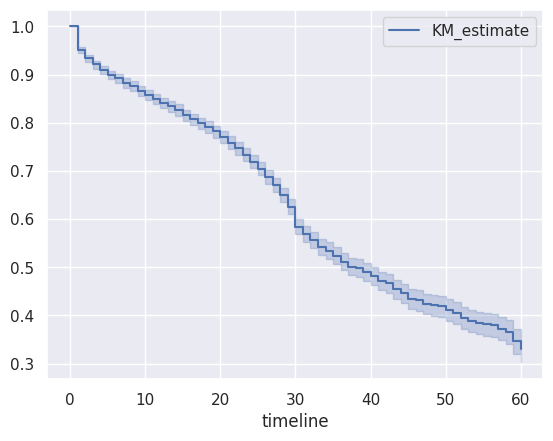

In [5]:
from lifelines import KaplanMeierFitter

# Create a Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the estimator to your data
event_times = df["day_succ"]
event_observed = df["Status"]
kmf.fit(event_times, event_observed)

# Plot the Kaplan-Meier survival curve
kmf.plot()

# Découverte des données

## Analyse univariée

In [ ]:
df[var_numeriques].describe()

In [ ]:
df[var_categoriques].describe()

In [ ]:
# todo: commenter

## Visualisation

### Variables numériques

In [ ]:
for var in var_numeriques:
    _, ax = plt.subplots(1, 2, figsize=(8, 2))
    sns.boxplot(df[var], width=0.25, ax=ax[0])
    sns.histplot(df[var], kde=True, ax=ax[1])
    plt.show()

In [ ]:
# todo: commenter les distributions et boxplots

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    df[var_numeriques].corr()[df[var_numeriques].corr().abs() > 0.5],
    annot=True,
    cmap="BrBG",
    linewidths=0.5,
    vmax=1,
    vmin=-1,
)

In [ ]:
# todo: commenter la matrice de corrélation

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs présentes")
df.notna().sum()[var_numeriques].plot.barh(ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df[var_numeriques].isna(), cbar=False, ax=ax[1])

Nous observons qu'il n'y a quasiment pas de valeurs manquantes parmi les variables numériques.

### Variables catégoriques

In [ ]:
for var in var_categoriques:
    if df[var].nunique() > 3:
        sns.histplot(y=df[var])
    else:
        plt.figure(figsize=(4, 2))
        sns.histplot(df[var], shrink=0.3)
    plt.show()

In [ ]:
df[
    df[var_categoriques].columns[df[var_categoriques].nunique() > 3]
].value_counts().plot(kind="bar")

In [ ]:
# todo: commenter

#### Valeurs manquantes

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].set_title("Nombre de valeurs présentes")
df.notna().sum()[var_categoriques].plot.barh(ax=ax[0])

ax[1].set_title("Valeurs manquantes")
sns.heatmap(df[var_categoriques].isna(), cbar=False, ax=ax[1])

Nous observons l'absence de valeurs manquantes parmi les variables catégoriques.

### Dates

In [ ]:
# todo

In [ ]:
df["Dt_Customer"].hist(bins=50)

# Sauvegarde du Dataframe

In [ ]:
df.to_csv("../data/data.csv")